This is group 25 consisting of Aswath(CSE18214), Karthic(18231). Presenting the BigMart dataset.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import  scipy as sc
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Reading Bigmart Dataset

In [2]:
df=pd.read_csv('https://github.com/karthicsalem/fods-sem-5/raw/master/bigmart.csv')
d=df.copy()

The BigMart dataset contains 2013 sales data about 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

In [3]:
df.shape

(8523, 12)

We have to look at the dataset structure before any preprocessing. Our dataset have 8523 rows and 12 columns.

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Our dataset details various attributes about products and markets such as - weight, fat content, MRP, outlet size, outlet type, outlet location and product sales. These attributes will be useful in our analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


A short description on column names and types. We will further try to impute Object types to float with various techniques.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

##Exploratory Data Analysis

After understanding the dimensions and properties of data, we have to deep dive and explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

In [6]:
sns.set_style('white')
sns.set_style('ticks')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


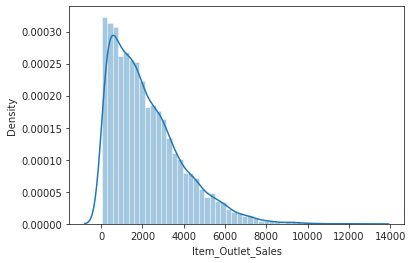

In [7]:
sns.distplot(df['Item_Outlet_Sales']);

Plotted Outlet sales to understand the distribution better as it is an important attribute to our analysis. We observe that -
Deviate from the normal distribution, Have appreciable positive skewness, Show peakedness.

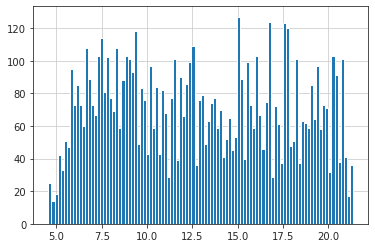

In [8]:
df['Item_Weight'].hist(bins = 100);

There seems to be no clear-cut pattern in Item_Weight. 

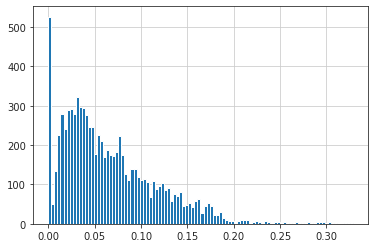

In [9]:
df['Item_Visibility'].hist(bins = 100);

Item_Visibility is right-skewed and should be transformed to curb its skewness. Especially because there is no practical sense of an item having 0 visbility.

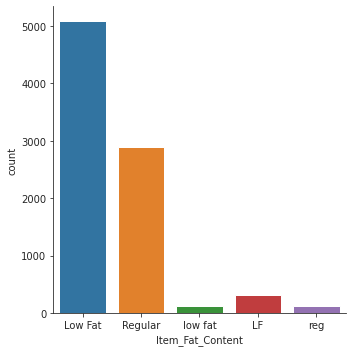

In [10]:
sns.catplot(x="Item_Fat_Content", kind="count", data=df);

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


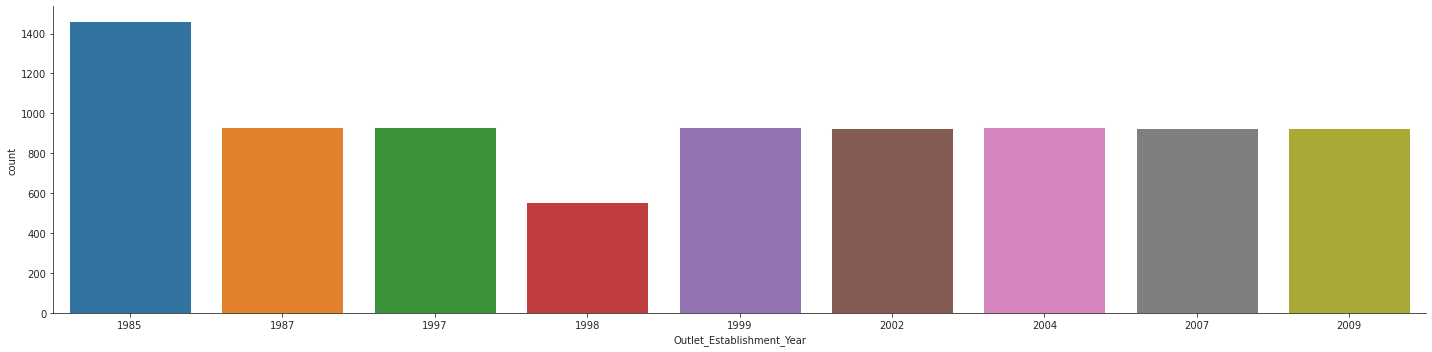

In [11]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = df,aspect =4);

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years. This column does not seem to be of much value and might be changed to "From_year established" for further analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


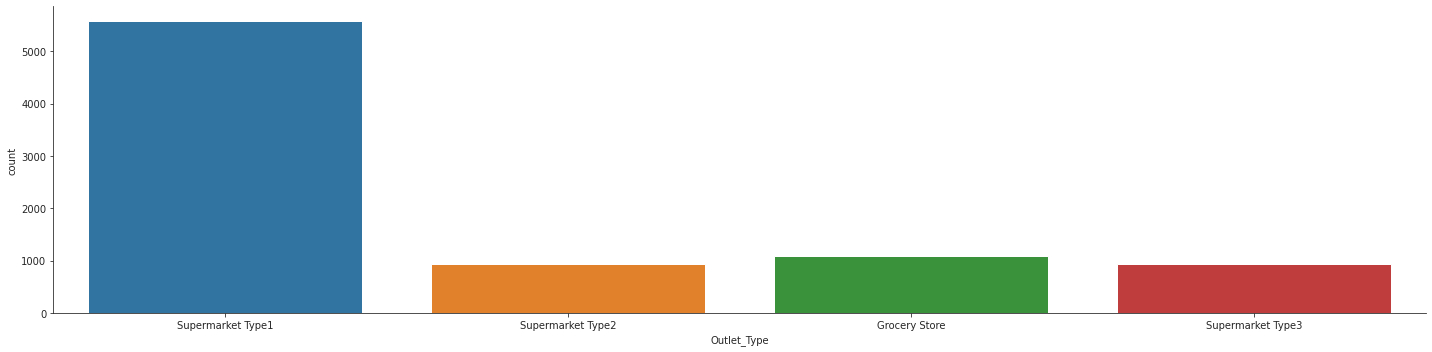

In [12]:
sns.catplot('Outlet_Type',kind = 'count',data = df,aspect =4);

There is much greater data observations for supermarket type 1 in comparison to others

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


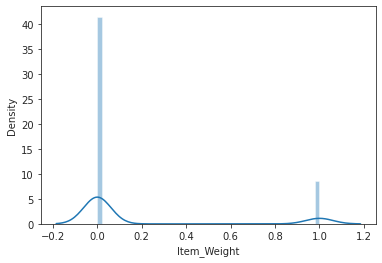

In [13]:
sns.distplot(df['Item_Weight'].isnull());

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


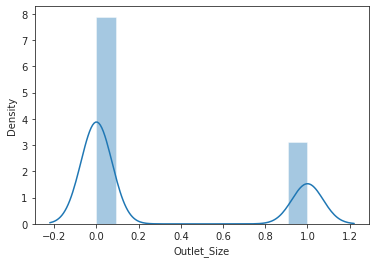

In [14]:
sns.distplot(df['Outlet_Size'].isnull());

From this plot we infer that Item_Weight and Outlet_Size needs preprocessing to remove the null values (shown by 0).

# Modifying Fat Category

In [15]:
d=df.copy()
df.describe()
d['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
d['Item_Fat_Content'] = d['Item_Fat_Content'].replace({'LF':'Low Fat'
                        ,'reg':'Regular','low fat':'Low Fat'})
d['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Checking for null values

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df.shape

(8523, 12)

In [19]:
df['Item_Weight'].nunique()

415

# Filling Null Values Item_Weight 
  *   By Average value of weight for each Item_Identifier
  *   Remaining by Average value of Item_fat_content 



In [20]:
d['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
b=d.groupby(['Item_Identifier'])
b.mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600,0.031956,141.865400,2001.166667,1843.600200
DRA24,19.350,0.048062,164.086800,1995.000000,2246.218971
DRA59,8.270,0.134718,185.179900,1995.875000,2614.430150
DRB01,7.390,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...
NCZ30,6.590,0.024956,120.752657,1997.428571,1807.647000
NCZ41,19.850,0.051623,125.630400,2001.800000,1827.487840
NCZ42,10.500,0.009044,236.644800,1999.000000,3839.801760


In [22]:
d['Item_Weight']=d['Item_Weight'].fillna(d.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
d

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
d[d['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [24]:
d['Item_Weight']=d['Item_Weight'].fillna(d.groupby(['Item_Type','Item_Fat_Content'])['Item_Weight'].transform('mean'))
d[d['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Filling Null Values in Outlet_Size
*   By most frequent value of Outlet_Type




In [25]:
d['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
from scipy.stats import mode
common= d.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x)[0]) )
temp= d['Outlet_Size'].isnull()
d.loc[temp,'Outlet_Size'] = d.loc[temp,'Outlet_Type'].apply(lambda x: common[x])
d.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Categorising using Item_identifier


0.   Drinks
1.   Food
2.   Non-Consumable





In [27]:
d['Item_Category']=d['Item_Identifier'].str[:2]
rename={'Item_Category':{'FD':'Food','NC':'Non-Consumable','DR':'Drinks'}}
d.replace(rename,inplace=True)
d['Item_Category']=d['Item_Category'].astype('category')
d['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

In [28]:
d['Item_Cat']=d['Item_Category'].cat.codes
d['Item_Cat'].value_counts()

1    6125
2    1599
0     799
Name: Item_Cat, dtype: int64

In [29]:
sns.set_style('white')
sns.set_style('ticks')

##Visualization

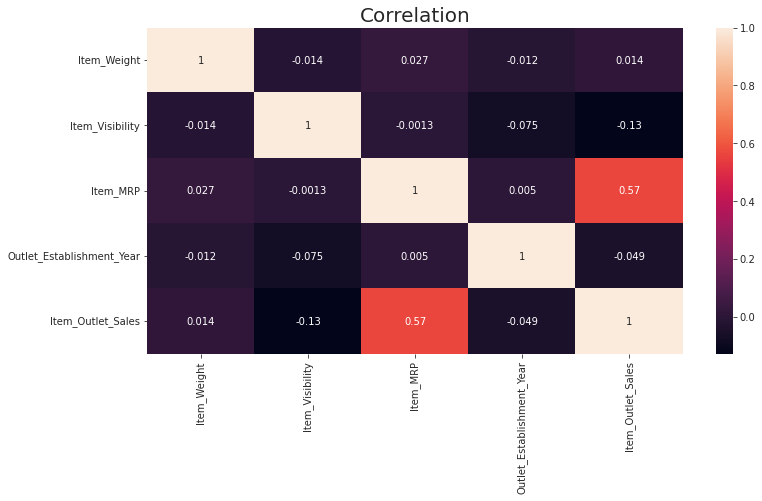

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation",fontdict={'fontsize':20});

##Conclusion
This heatmap gives the ratio of interdependency between each column.The higher the value more the 2 columns are interrelated.


##1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


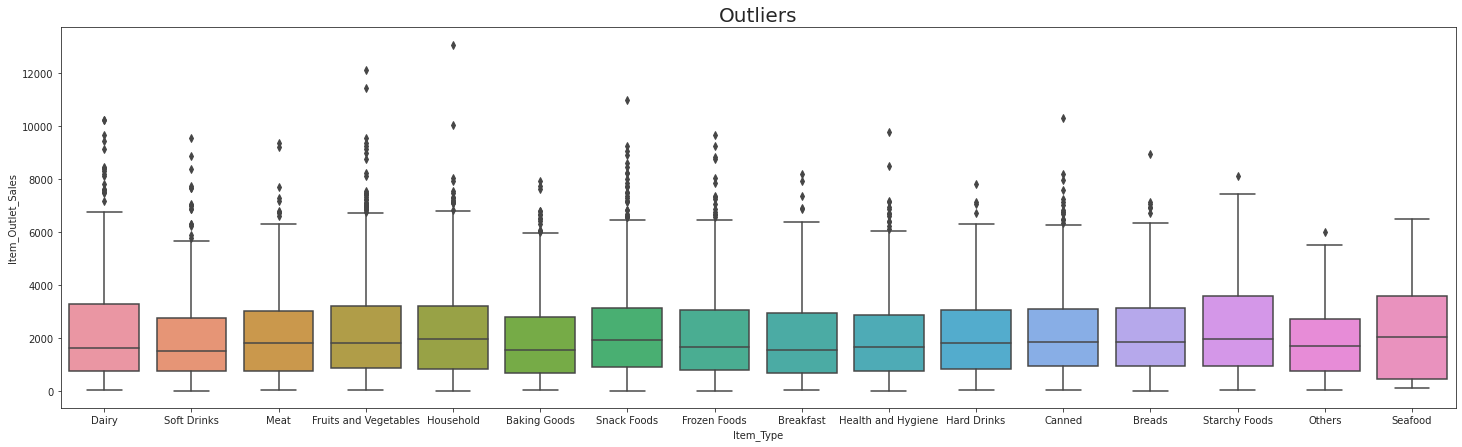

In [31]:
plt.figure(figsize=(25,7))
sns.boxplot(d['Item_Type'],d['Item_Outlet_Sales'])
plt.title("Outliers",fontdict={'fontsize':20});

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

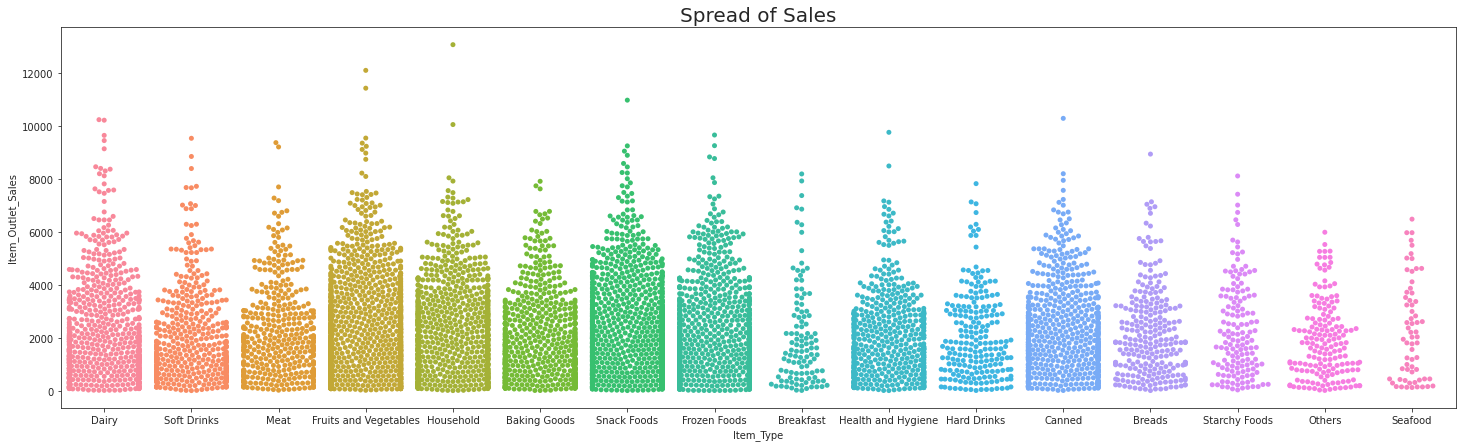

In [32]:
plt.figure(figsize=(25,7))
sns.swarmplot(d['Item_Type'],d['Item_Outlet_Sales'])
plt.title("Spread of Sales",fontdict={'fontsize':20});


##Conclusion
From the above Box plot we can find that the Item sales above 6000 are considered outliers and the swar plot re emphasizes that the item sales are mostly below the value of 6000


##2

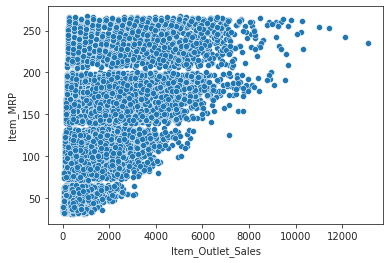

In [33]:
sns.scatterplot(data=d,x="Item_Outlet_Sales",y="Item_MRP")
plt.title("",fontdict={'fontsize':20});

##Conclusion
Though from the previous scatter plot we found the item sales on a average is 6000 from this plot we infer that the item with price 50 and 100 has a substantial sale in the range of 2000 and 4000 respectively.The other two item price has the range of 0-6000 like we inferred above.

##3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


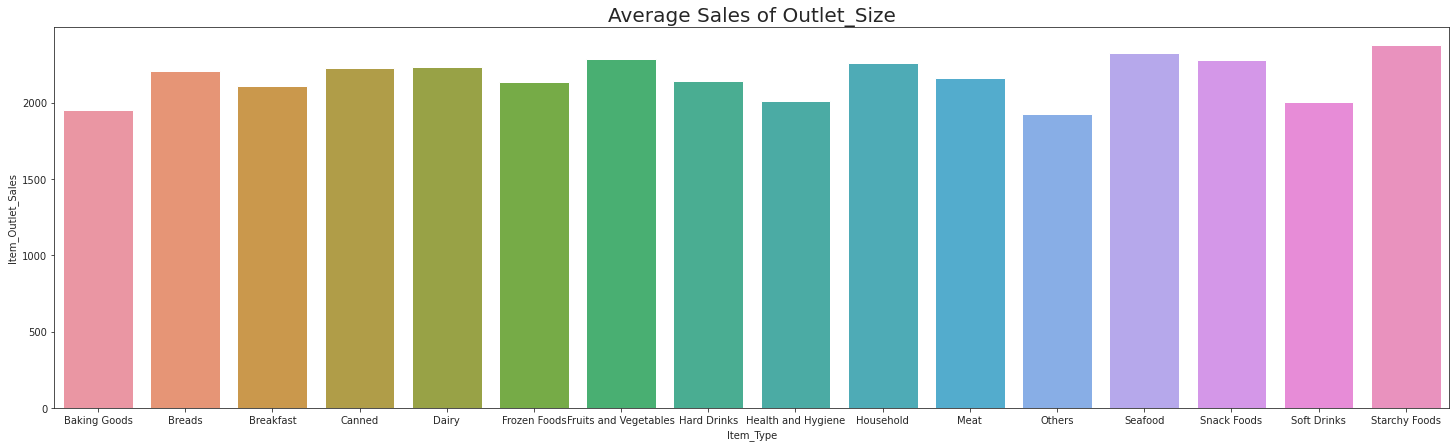

In [34]:
plt.figure(figsize=(25,7))
sns.set_style('white')
sns.set_style('ticks')
#h=d.groupby('Outlet_Size').mean()
h=d.groupby('Item_Type').mean()

sns.barplot(h.index,h['Item_Outlet_Sales'])
plt.title("Average Sales of Outlet_Size",fontdict={'fontsize':20});

##Conclusion
From this box plot we find that the shops of medium size has more sales on average follwed by high and the small sized shops.

##4

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


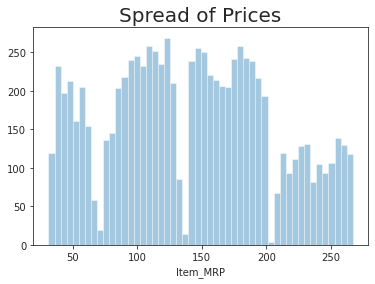

In [35]:
sns.distplot(d["Item_MRP"],kde=False,bins=50)
plt.title("Spread of Prices",fontdict={'fontsize':20})
plt.show()
#We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

##Conclusion
The range for the item price is from 0-250.But from this distplot is clear that the item price is not evenly distributed.In each range(meaning 0-100,100-150,150-200,200-300),the item price lies predominantly in some ranges groups. We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

##5

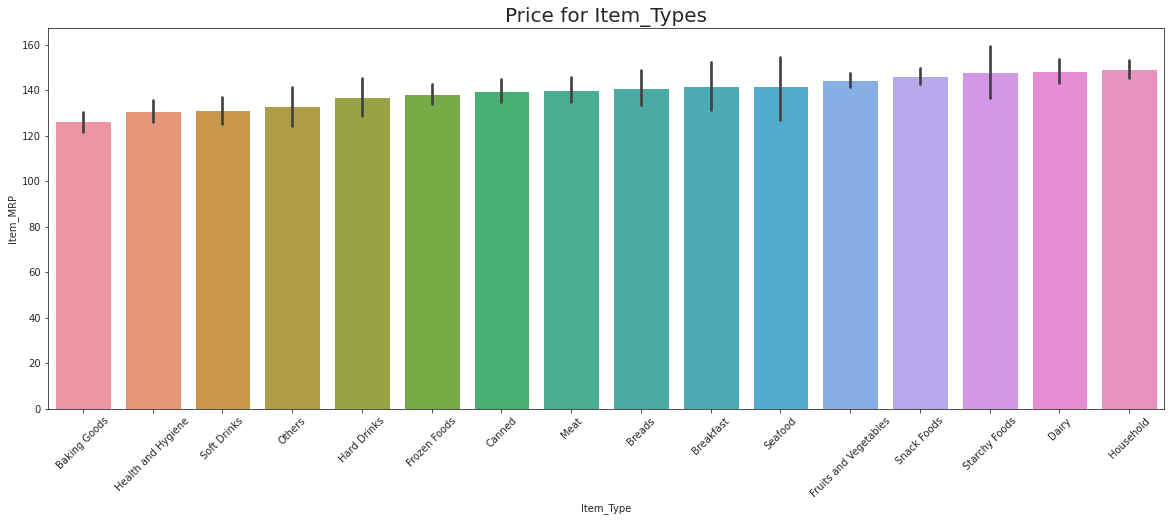

In [36]:
plt.figure(figsize=(20,7))

sns.barplot(data=d, x="Item_Type",y="Item_MRP",order=d.groupby("Item_Type").mean().sort_values("Item_MRP").index)
plt.xticks(rotation=45)
plt.title("Price for Item_Types",fontdict={'fontsize':20})
plt.show()

##Conclusion
The barplot shows that though Starchy food has the maximum item mrp, on an average the item mrp of Household is more followed by others as depicted in the plot.

##6

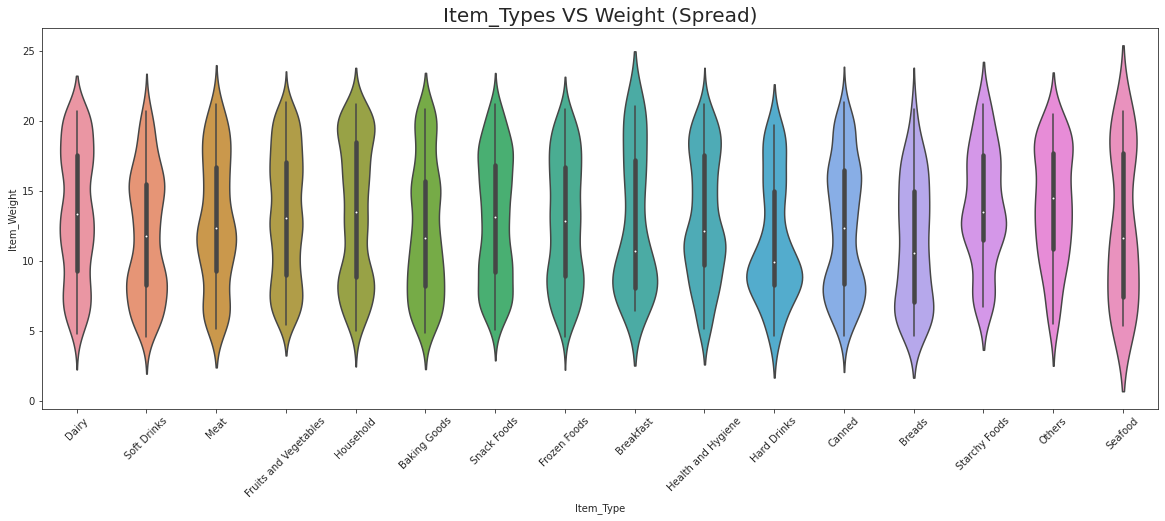

In [37]:
plt.figure(figsize=(20,7))

sns.violinplot(data=d, x="Item_Type",y="Item_Weight")
plt.xticks(rotation=45)
plt.title("Item_Types VS Weight (Spread)",fontdict={'fontsize':20})
plt.show()
#Expecting some products to lie in a particular range, we created this violing plot. But from the given plot, we conclue that the weights are so diverse.

##Conclusion
From this violin plot we can see that the item weights in each item types is evenly distributed all along the range of 0-25.
Though the only anomaly is that the Hard drinks have values slightly predominant in the range of 5-10 

##7

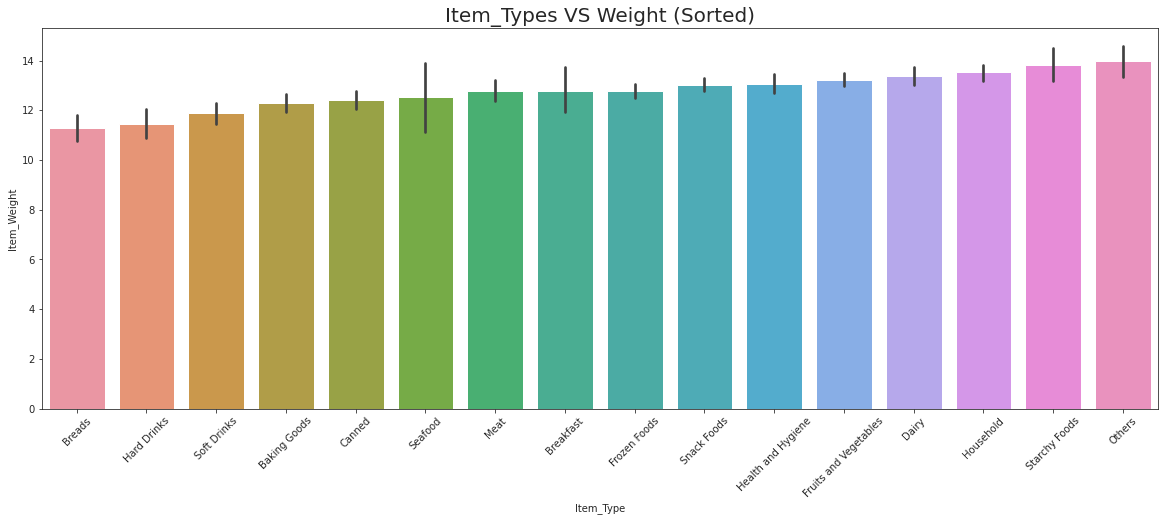

In [38]:
plt.figure(figsize=(20,7))

sns.barplot(data=d, x="Item_Type",y="Item_Weight",order=d.groupby("Item_Type").mean().sort_values("Item_Weight").index)
plt.xticks(rotation=45)
plt.title("Item_Types VS Weight (Sorted)",fontdict={'fontsize':20})
plt.show()

##8

In [39]:
x=d.groupby('Item_Type').mean()['Item_Weight'].round(0)
x=pd.DataFrame(x)
x

,Item_Weight
Item_Type,
Baking Goods,12.0
Breads,11.0
Breakfast,13.0
Canned,12.0
Dairy,13.0
Frozen Foods,13.0
Fruits and Vegetables,13.0
Hard Drinks,11.0
Health and Hygiene,13.0


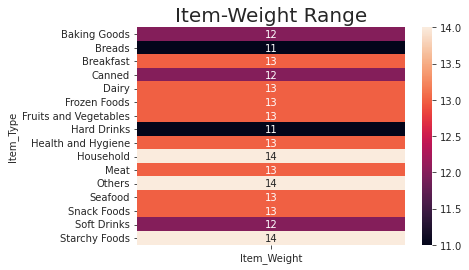

In [40]:
sns.heatmap(x,annot=True)
plt.title("Item-Weight Range",fontdict={'fontsize':20});

##Conclusion
From the above barplot it can be concluded that the average weight of all item types lies in the range of 10-14 and the item type Others has the highest average weight. This is further shown in the heatmap that the range is from 11-14 when the values are rounded off.



##Linear Regresion

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
x=d['Item_MRP'].values
y=d['Item_Outlet_Sales'].values


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=0)

In [44]:
n=8523


In [45]:
x_train=x_train.reshape((x_train.shape[0],1))
x_test=x_test.reshape((x_test.shape[0],1))

In [46]:
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y1_pred=reg.predict(x_test)

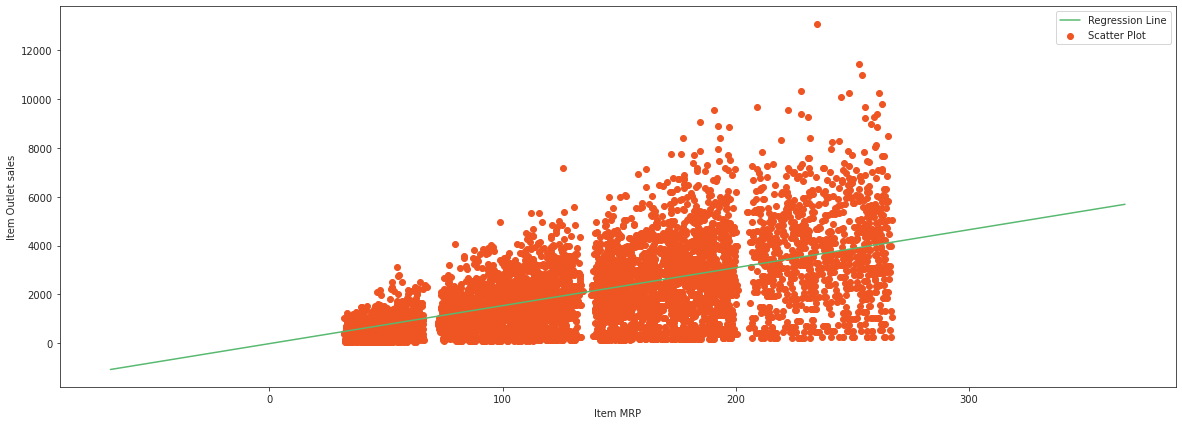

In [48]:
max_x = np.max(x_train) + 100
min_x = np.min(x_train) - 100
plt.figure(figsize=(20,7))

x1 = np.linspace(min_x, max_x, 1000)
y1 = reg.intercept_ + reg.coef_[0] * x1

plt.plot(x1, y1, color='#58b970', label='Regression Line')

plt.scatter(x_train, y_train, c='#ef5423', label='Scatter Plot')

plt.xlabel('Item MRP')
plt.ylabel('Item Outlet sales')
plt.legend()
plt.show()

In [49]:


mse=mean_squared_error(y_test,y1_pred)
r2_score=reg.score(x_train,y_train)
np.sqrt(mse)

1434.7101429973047

In [50]:
r2_score

0.3271360387839035

In [51]:

k=[10,20]
k=np.array(k)
k=k.reshape(2,1)
print(reg.predict(k))

[138.81968028 294.30687508]


##MULTIVARIATE REGRESSION

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

-Label Encoding:

In [53]:

dat = d.copy()
labelencoder=LabelEncoder()
dat[['Item_Fat_Content']] = labelencoder.fit_transform(dat[['Item_Fat_Content']])
dat[['Item_Type']] = labelencoder.fit_transform(dat[['Item_Type']])
dat[['Outlet_Size']] = labelencoder.fit_transform(dat[['Outlet_Size']])
dat[['Outlet_Location_Type']] = labelencoder.fit_transform(dat[['Outlet_Location_Type']])
dat[['Outlet_Type']] = labelencoder.fit_transform(dat[['Outlet_Type']])
dat = dat.drop(['Item_Identifier','Outlet_Identifier', 'Item_Category'],axis=1)
dat_Invis = dat[dat["Item_Visibility"]==0.000000]
dat_Vis = dat[dat["Item_Visibility"]!=0.000000]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:

X=dat_Vis["Item_Outlet_Sales"].values.reshape((7997,1))
Y=dat_Vis["Item_Visibility"].values

-Removing Ouliers


In [55]:
def remove_outliers(imputed_data):
    mean_change = imputed_data['Item_Outlet_Sales'].mean()
    std_change = imputed_data['Item_Outlet_Sales'].std()
    lower = mean_change - 2 * std_change
    upper = mean_change + 2 * std_change
    cleaned_data = imputed_data[(imputed_data['Item_Outlet_Sales'] > lower) & (imputed_data['Item_Outlet_Sales'] < upper)]
    number_of_rows_after_removal = cleaned_data.shape[0]
    return cleaned_data, number_of_rows_after_removal

-Finding highly correlated attributes

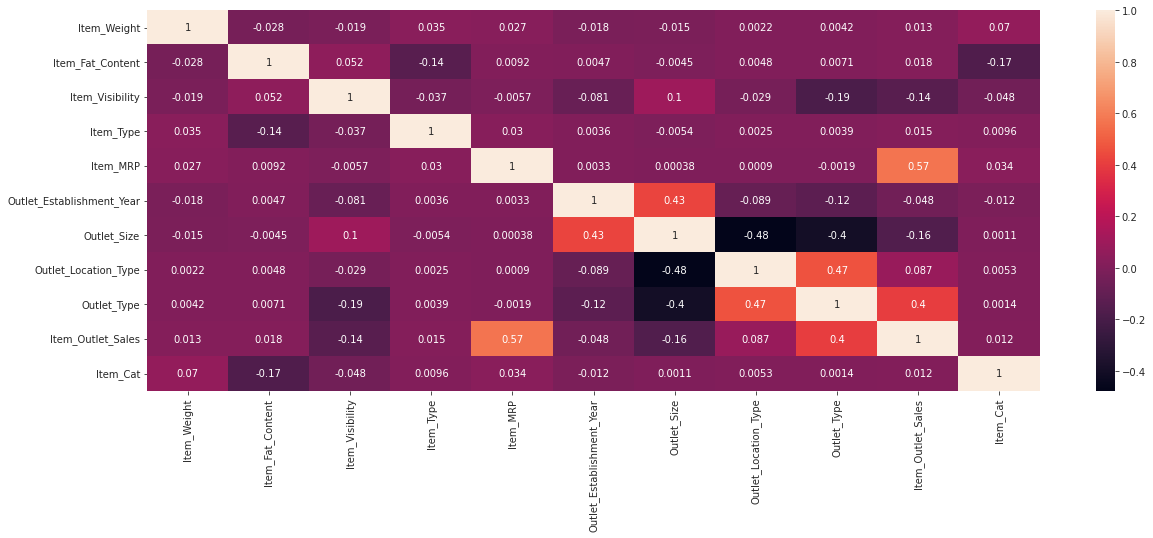

In [56]:
plt.figure(figsize=(20,7))
sns.heatmap(dat_Vis.corr(),annot=True);

In [57]:

data_WOUT,_ = remove_outliers(dat_Vis)
X1 = data_WOUT[["Item_Visibility","Item_MRP","Outlet_Size","Outlet_Type"]]
Y1 = data_WOUT['Item_Outlet_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.33,random_state=0)
reg3 = LinearRegression()
reg3.fit(X_train,y_train)
y_pred = reg3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),3)
print(rmse)

1025.508


In [58]:

r2_score=reg3.score(X_train,y_train)
r2_score

0.4482252801839645

In [59]:
k = np.array([0.019278,48.2692,1,2]).reshape((1,4))
print(reg3.predict(k))
k = np.array([0.079207,46.4744,2,0]).reshape((1,4))
print(abs(reg3.predict(k)))
k = np.array([0.072693,110.4912,2,1]).reshape((1,4))
print(reg3.predict(k))

[1502.3940094]
[16.3289886]
[1488.01672626]


##SUPPORT VECTOR MACHINE

In [60]:
from sklearn import svm

In [61]:
regr = svm.SVR()

In [62]:
regr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
y_pred=regr.predict(X_test)


In [64]:
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),3)
print(rmse)

1246.509


In [65]:
r2_score=regr.score(X_train,y_train)
r2_score

0.1785994932130821

##DECISION TREES

In [66]:
from sklearn import tree

In [67]:
clf = tree.DecisionTreeRegressor()

In [68]:
clf = clf.fit(X_train,y_train)

In [69]:
y_pred=clf.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),3)
print(rmse)

1275.129


In [71]:
r2_score=clf.score(X_train,y_train)
r2_score

1.0

# Lasso


In [74]:
from sklearn import linear_model
regd = linear_model.LassoLars()
regd.fit(X_train,y_train)
y_pred=regd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),3)
rmse

1030.803

In [75]:
r2_score=regd.score(X_train,y_train)
r2_score

0.4408827664997897

# Bayesian Ridge

In [76]:
from sklearn import linear_model
regd = linear_model.BayesianRidge()
regd.fit(X_train,y_train)
y_pred=regd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),3)
rmse

1025.528

In [77]:
r2_score=regd.score(X_train,y_train)
r2_score

0.4481941806043333